# Project Title:
SCALA CODE NB CLASSIFIER 

## 1. Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

# 2. Train Dataset

In [2]:
# dataset 
df_train = pd.read_csv("dataset_memory_AI_scala.csv")
df_train

,Rating,Cost(per hour USD),Instance
0,3.333333,0.0928,t2.large
1,1.666667,0.0832,B2ms
2,2.666667,0.0950,N1s2
3,1.666667,0.0150,Lin.G
4,4.000000,0.1000,c4.large
5,2.000000,0.0850,F2s
6,2.000000,0.0709,N1cc
7,1.000000,0.0450,Lin.C
8,3.666667,0.1330,r4.large
9,3.333333,0.1260,E2s


# 3. Data Preprocessing 

In [3]:
le = preprocessing.LabelEncoder()
df_train['instance']=le.fit_transform(df_train['Instance'])
df_train

,Rating,Cost(per hour USD),Instance,instance
0,3.333333,0.0928,t2.large,13
1,1.666667,0.0832,B2ms,0
2,2.666667,0.0950,N1s2,8
3,1.666667,0.0150,Lin.G,4
4,4.000000,0.1000,c4.large,9
5,2.000000,0.0850,F2s,2
6,2.000000,0.0709,N1cc,7
7,1.000000,0.0450,Lin.C,3
8,3.666667,0.1330,r4.large,12
9,3.333333,0.1260,E2s,1


Label Encoder converts categorical text data into model-understandable numerical data. We have been used Scikit-Learn Label Encoder class. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

# 4. Exploratory Data Analysis

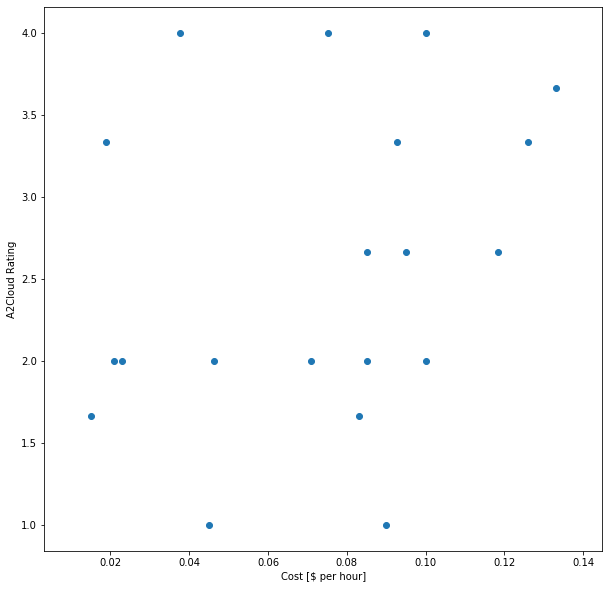

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

# 5. K-Means Clustering 

In [5]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 3)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1],
      dtype=int32)

In [6]:
df_train

,Rating,Cost(per hour USD),Instance,instance
0,3.333333,0.0928,t2.large,13
1,1.666667,0.0832,B2ms,0
2,2.666667,0.0950,N1s2,8
3,1.666667,0.0150,Lin.G,4
4,4.000000,0.1000,c4.large,9
5,2.000000,0.0850,F2s,2
6,2.000000,0.0709,N1cc,7
7,1.000000,0.0450,Lin.C,3
8,3.666667,0.1330,r4.large,12
9,3.333333,0.1260,E2s,1


In [7]:
# K MEANS output
static_label=pd.DataFrame([0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2]) # # 0: excellent, 1: avg, 2: bad cluster

#by observation 
#static_label=pd.DataFrame([1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1]) # # 0: excellent, 1: avg, 2: bad cluster

df_train['cluster']=static_label


Labels are going to change each run among clusters. For example, a cluster may be expressed as 0 but future run its gonna expressed as 1. However, overall label tags will be reamined same. To avoid labeling confusion, I will assaign fixed label using the very first run of Kmeans. Number of cluster and labels are associated with instance will be same.

In [8]:
df_train

,Rating,Cost(per hour USD),Instance,instance,cluster
0,3.333333,0.0928,t2.large,13,0
1,1.666667,0.0832,B2ms,0,2
2,2.666667,0.0950,N1s2,8,1
3,1.666667,0.0150,Lin.G,4,1
4,4.000000,0.1000,c4.large,9,0
5,2.000000,0.0850,F2s,2,1
6,2.000000,0.0709,N1cc,7,1
7,1.000000,0.0450,Lin.C,3,2
8,3.666667,0.1330,r4.large,12,0
9,3.333333,0.1260,E2s,1,0


Text(0, 0.5, 'A2Cloud Rating')

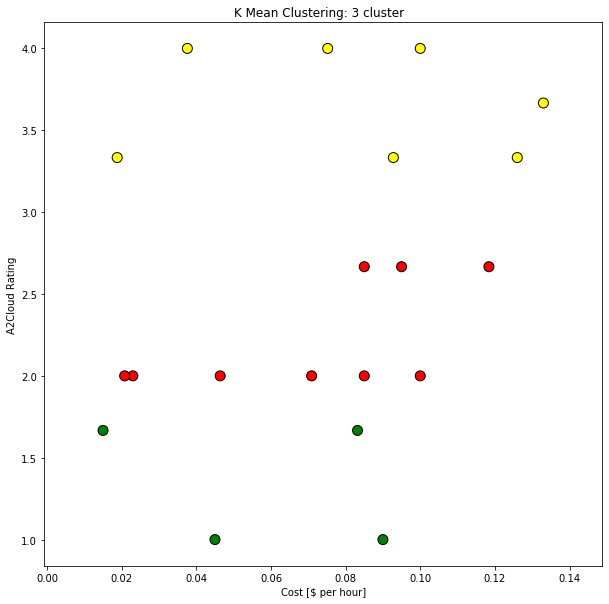

In [9]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

# 6. Gaussian NB Classifier Train


In [10]:
xtrain=df_train[['Rating','Cost(per hour USD)']]
ytrain=df_train['cluster'].values.tolist()

In [11]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# 7. Gaussian NB Classifier Test


In [12]:

df_test = pd.read_csv("dataset_memory_runtime_scala.csv")
df_test

,Rating,Cost(per hour USD),Instance
0,3.666667,0.0928,t2.large
1,1.333333,0.0832,B2ms
2,2.666667,0.0950,N1s2
3,2.000000,0.0150,Lin.G
4,4.000000,0.1000,c4.large
5,2.666667,0.0850,F2s
6,2.000000,0.0709,N1cc
7,3.000000,0.0450,Lin.C
8,3.666667,0.1330,r4.large
9,3.000000,0.1260,E2s


In [13]:
#df_kmeans=df
X=df_test.iloc[:,0:2]
#y_actual=[0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2]# 0: excellent, 1: bad, 2: avg cluster 

#y_actual=[0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]# 0: excellent, 1: avg, 2: bad cluster  

model_test = KMeans(n_clusters = 3)

kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0],
      dtype=int32)

Text(0, 0.5, 'A2Cloud Rating')

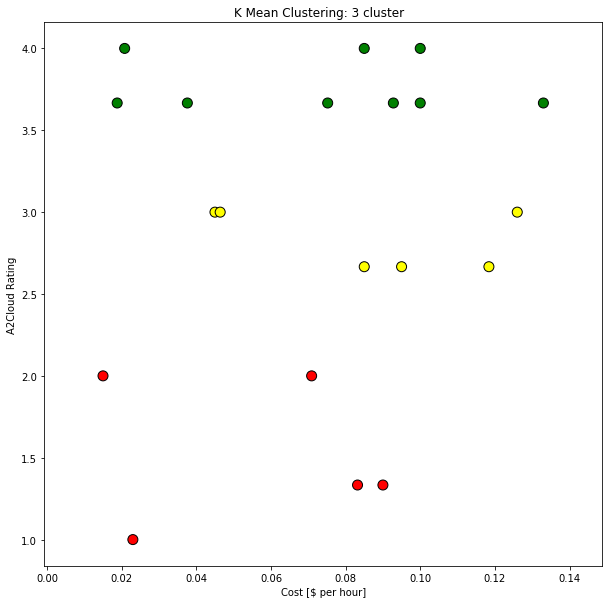

In [14]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_test.iloc[:,1:2], df_test.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

In [15]:

y_actual=[0,2,1,2,0,1,2,1,0,1,1,2,0,0,1,2,0,0,0,0]      # k mean cluster output, 0: excellent, 1: bad, 2: avg cluster 
 
xtest=df_test[['Rating','Cost(per hour USD)']]

In [16]:
y_pred = classifier.predict(xtest)


In [17]:
y_pred

array([0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0])

# NB Classifier Evaluation Metrics

### 7.1 Confusion Matrix


In [18]:
print(confusion_matrix(y_pred, y_actual))


[[9 1 0]
 [0 5 2]
 [0 0 3]]


### 7.2 Model Accuracy 

In [19]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 85.0 %


### 7.3 Model Precision, Recall and F1-score


In [20]:
print(classification_report(y_pred,y_actual))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.83      0.71      0.77         7
           2       0.60      1.00      0.75         3

    accuracy                           0.85        20
   macro avg       0.81      0.87      0.82        20
weighted avg       0.88      0.85      0.86        20



### 7.4 Model Mean Absolute Error 


In [21]:
mean_absolute_error(y_pred,y_actual)

0.15

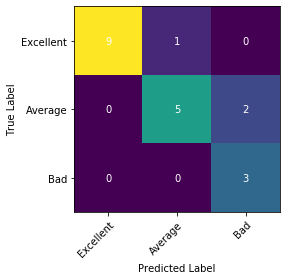

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Average", "Bad"]
p_label = ["Excellent", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [23]:
y_actual


[0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0]

In [24]:
y_pred

array([0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0])